In [53]:
import pandas as pd

# Load the dataset
df = pd.read_csv("owid-covid-data.csv")

# Show column names
print("Columns in the dataset:")
print(df.columns)

# Preview the first few rows
print("\nFirst 5 rows:")
print(df.head())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Columns in the dataset:
Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinati

In [59]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
iso_code                                        0
continent                                   16665
location                                        0
date                                            0
total_cases                                 37997
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       337901
excess_mortality_cumulative                337901
excess_mortality                           337901
excess_mortality_cumulative_per_million    337901
Length: 67, dtype: int64


In [55]:
# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

# Filter for selected countries
countries = ['Kenya', 'United States', 'India', 'China']
df_filtered = df[df['location'].isin(countries)]

# Drop rows where 'total_cases' or 'total_deaths' is missing
df_filtered = df_filtered.dropna(subset=['total_cases', 'total_deaths'])

# Optionally fill other missing values (e.g., vaccinations) with 0 or interpolation
df_filtered['total_vaccinations'] = df_filtered['total_vaccinations'].fillna(0)

# Reset index
df_filtered = df_filtered.reset_index(drop=True)

# Check cleaned data
print(df_filtered.head())
print("\nRemaining missing values:")
print(df_filtered.isnull().sum())

  iso_code continent location       date  total_cases  new_cases  \
0      CHN      Asia    China 2020-01-12         45.0       41.0   
1      CHN      Asia    China 2020-01-13         45.0        0.0   
2      CHN      Asia    China 2020-01-14         45.0        0.0   
3      CHN      Asia    China 2020-01-15         45.0        0.0   
4      CHN      Asia    China 2020-01-16         45.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0               6.286           1.0         1.0                0.143  ...   
1               5.857           1.0         0.0                0.143  ...   
2               5.857           1.0         0.0                0.143  ...   
3               5.857           1.0         0.0                0.143  ...   
4               5.857           1.0         0.0                0.143  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0          48.4                     NaN                  

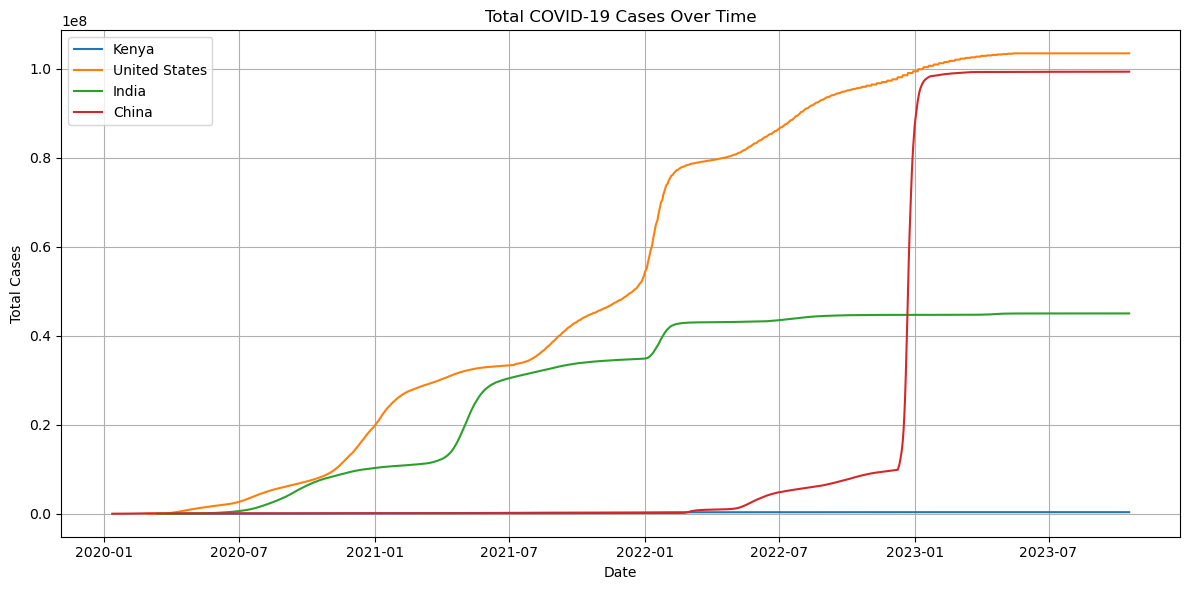

In [57]:
# Plot total cases over time for selected countries.
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(12, 6))

# Plot total cases for each country
for country in ['Kenya', 'United States', 'India', 'China']:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

# Customize the plot
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

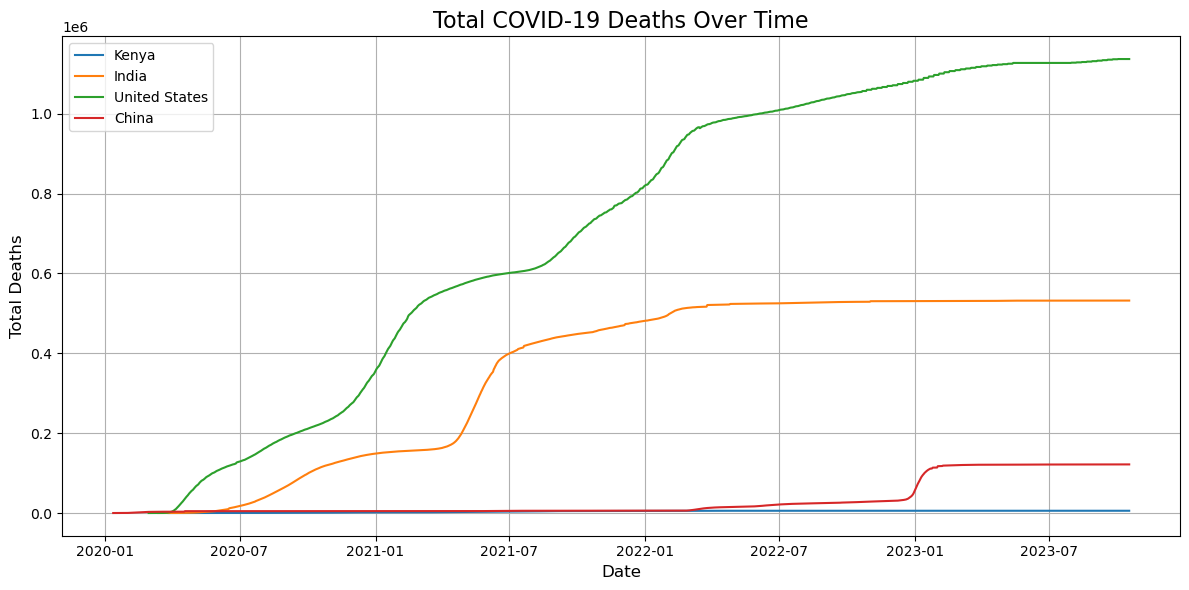

In [61]:
# Plot total deaths over time
import matplotlib.pyplot as plt

# Define the countries you want to plot
countries = ['Kenya', 'India', 'United States','China']

# Set up the plot
plt.figure(figsize=(12, 6))

# Loop through each country and plot
for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)

# Add chart title and labels
plt.title("Total COVID-19 Deaths Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Deaths", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


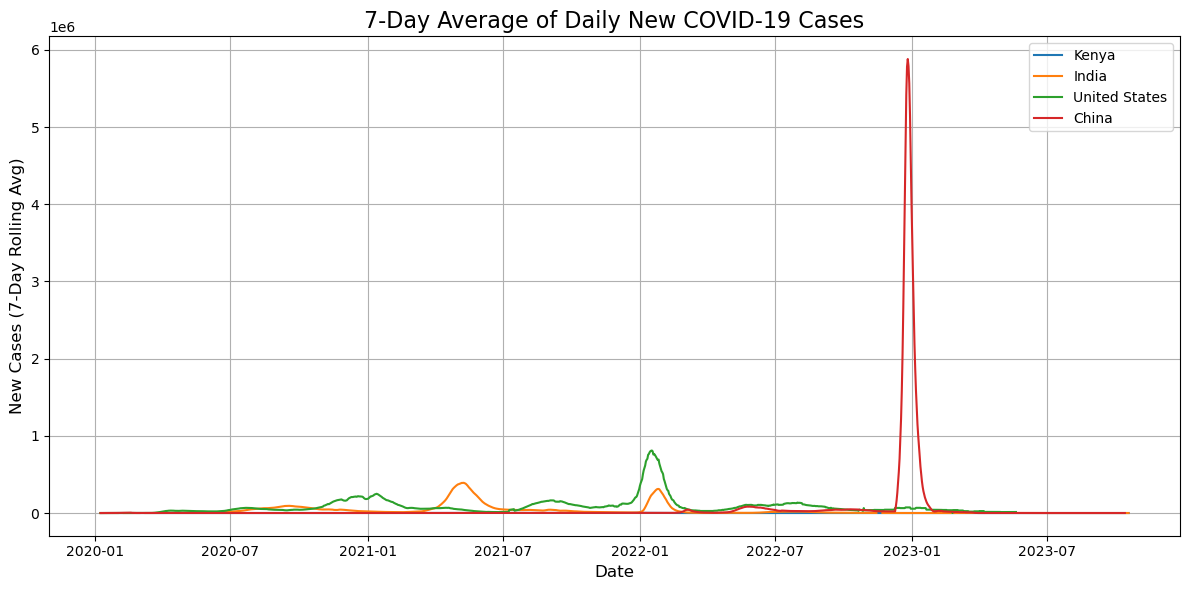

In [65]:
# Compare daily new cases between countries.
# Plot 7-day rolling average of daily new COVID-19 cases
plt.figure(figsize=(12, 6))

# Loop through each country and apply 7-day rolling average
for country in countries:
    country_data = df[df['location'] == country].copy()
    country_data = country_data.sort_values('date')  # Ensure sorted by date
    country_data['new_cases_7day_avg'] = country_data['new_cases'].rolling(window=7).mean()
    plt.plot(country_data['date'], country_data['new_cases_7day_avg'], label=country)

# Add labels and title
plt.title("7-Day Average of Daily New COVID-19 Cases", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("New Cases (7-Day Rolling Avg)", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()



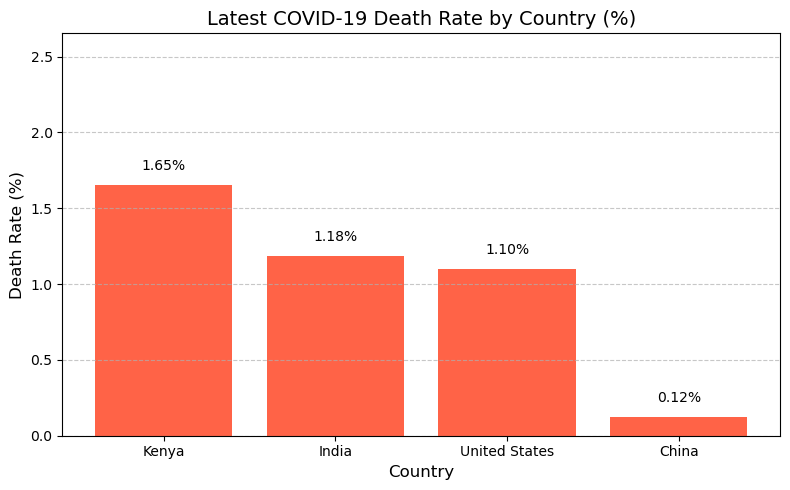

In [69]:
# Calculate the death rate: total_deaths / total_cases.
import numpy as np

# Choose countries to compare
countries = ['Kenya', 'India', 'United States', 'China']

# Create a dictionary to hold latest death rates
death_rates = {}

# Loop through each country and get the most recent non-null death rate
for country in countries:
    country_data = df[df['location'] == country]
    latest = country_data.dropna(subset=['total_deaths', 'total_cases']).sort_values('date').iloc[-1]
    death_rate = (latest['total_deaths'] / latest['total_cases']) * 100  # Convert to percentage
    death_rates[country] = death_rate

# Plot as a bar chart
plt.figure(figsize=(8, 5))
plt.bar(death_rates.keys(), death_rates.values(), color='tomato')
plt.title("Latest COVID-19 Death Rate by Country (%)", fontsize=14)
plt.ylabel("Death Rate (%)", fontsize=12)
plt.xlabel("Country", fontsize=12)
plt.ylim(0, max(death_rates.values()) + 1)

# Annotate the bars with values
for country, rate in death_rates.items():
    plt.text(country, rate + 0.1, f"{rate:.2f}%", ha='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [92]:
# Calculate death rate column for each row in the dataframe
df_filtered['death_rate'] = df_filtered.apply(
    lambda row: row['total_deaths'] / row['total_cases'] if row['total_cases'] > 0 else None,
    axis=1
)

# Check the death rate for the latest date for each country
latest_data = df_filtered.sort_values('date').dropna(subset=['death_rate'])
latest_data = latest_data.groupby('location').tail(1)  # Get the latest entry for each country

# Display the results (optional)
latest_data[['location', 'date', 'total_cases', 'total_deaths', 'death_rate']].head()

,location,date,total_cases,total_deaths,death_rate
1375,China,2023-10-18,99315684.0,121742.0,0.001226
3991,Kenya,2023-10-18,343999.0,5689.0,0.016538
2690,India,2023-10-18,44999588.0,532037.0,0.011823
5319,United States,2023-10-18,103436829.0,1136920.0,0.010991


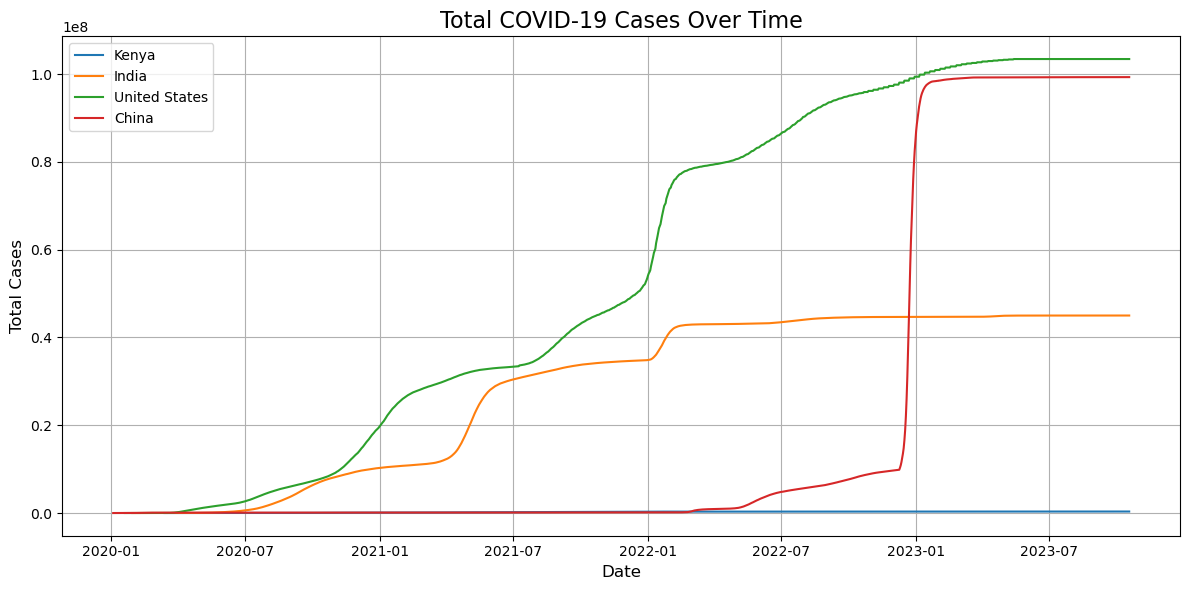

In [71]:
#  Line Chart 1: Total Cases Over Time
# Select countries
countries = ['Kenya', 'India', 'United States', 'China']

plt.figure(figsize=(12, 6))

# Plot total cases for each country
for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

# Chart formatting
plt.title("Total COVID-19 Cases Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Cases", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

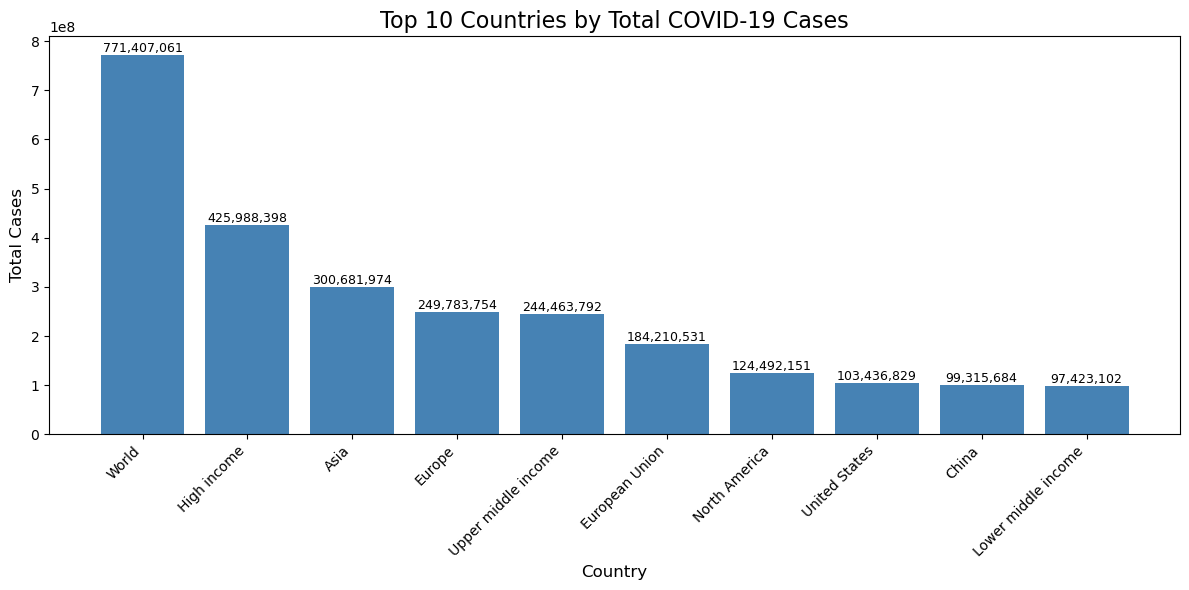

In [73]:
# Top 10 Countries by Total COVID-19 Cases
latest_data = df.dropna(subset=['total_cases']).sort_values('date').groupby('location').tail(1)

# Sort by total_cases and get the top 10
top_countries = latest_data.sort_values('total_cases', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(top_countries['location'], top_countries['total_cases'], color='steelblue')
plt.title("Top 10 Countries by Total COVID-19 Cases", fontsize=16)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Total Cases", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add value labels
for index, value in enumerate(top_countries['total_cases']):
    plt.text(index, value, f'{int(value):,}', ha='center', va='bottom', fontsize=9)

plt.show()

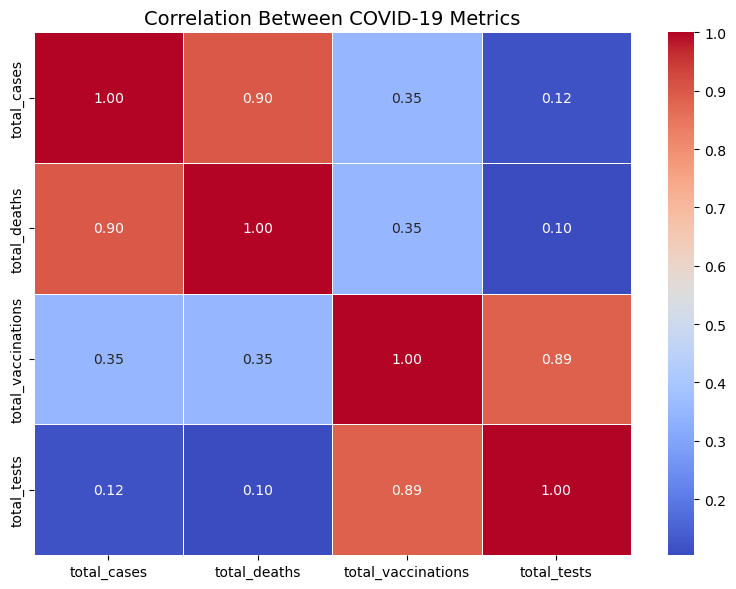

In [75]:
# Heatmaps (optional for correlation analysis)
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Get the latest data per country (drop rows with major nulls)
latest_data = df[['location', 'date', 'total_cases', 'total_deaths', 'total_vaccinations', 'total_tests']].dropna()
latest_data = latest_data.sort_values('date').groupby('location').tail(1)

# Step 2: Choose numeric columns
correlation_data = latest_data[['total_cases', 'total_deaths', 'total_vaccinations', 'total_tests']]

# Step 3: Compute correlation matrix
corr_matrix = correlation_data.corr()

# Step 4: Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Between COVID-19 Metrics", fontsize=14)
plt.tight_layout()
plt.show()

#### Visualizing Vaccination Progress

## Goal: Analyze vaccination rollouts.

## Plot Cumulative Vaccinations Over Time for Selected Countries
## This will show how vaccination numbers have grown over time.

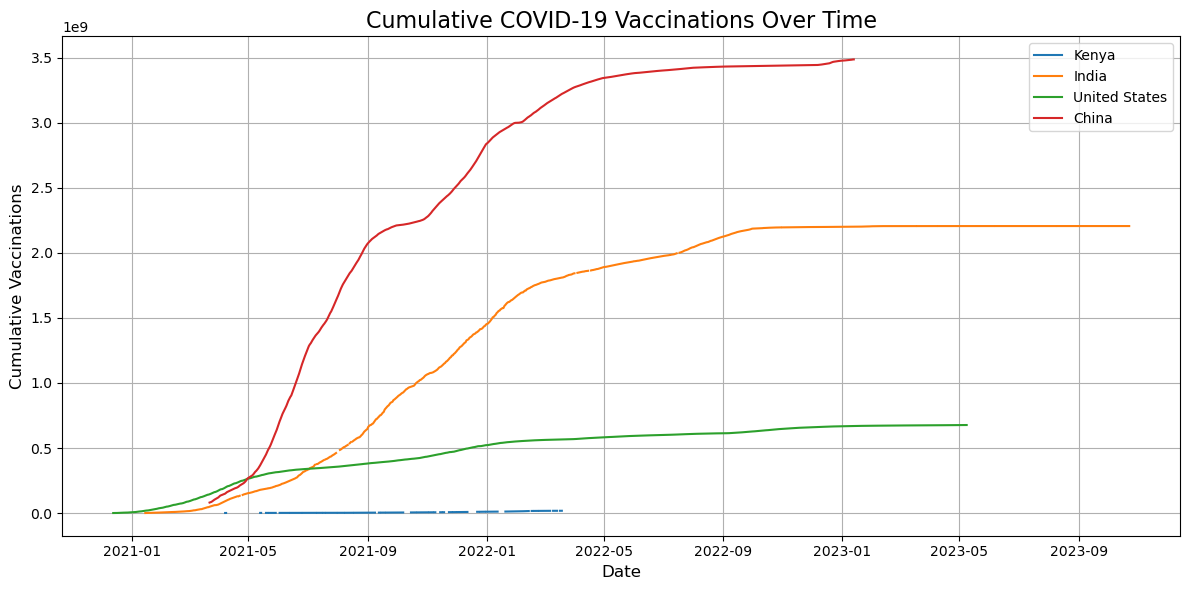

In [94]:
import matplotlib.pyplot as plt

# Select countries to compare
countries = ['Kenya', 'India', 'United States', 'China']

plt.figure(figsize=(12, 6))

# Plot cumulative vaccinations over time for each country
for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)

# Chart formatting
plt.title("Cumulative COVID-19 Vaccinations Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Cumulative Vaccinations", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
##  Compare % Vaccinated Population
## This will show the percentage of the population vaccinated in each country.

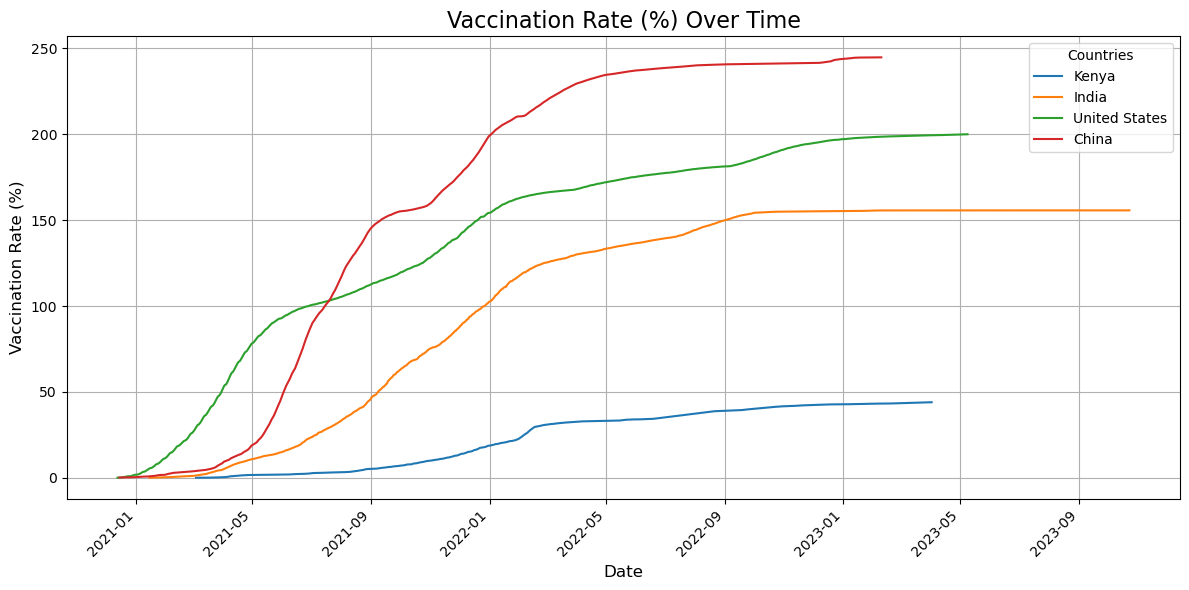

In [104]:
import matplotlib.pyplot as plt

# Ensure the data has both 'total_vaccinations' and 'population'
df_filtered = df.dropna(subset=['total_vaccinations', 'population']).copy()

# Calculate the vaccination rate for each row using .loc[]
df_filtered.loc[:, 'vaccination_rate'] = (df_filtered['total_vaccinations'] / df_filtered['population']) * 100

# Select countries to compare
countries = ['Kenya', 'India', 'United States', 'China']

# Create a plot
plt.figure(figsize=(12, 6))

# Plot vaccination rate over time for each selected country
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['vaccination_rate'], label=country)

# Chart formatting
plt.title("Vaccination Rate (%) Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Vaccination Rate (%)", fontsize=12)
plt.legend(title="Countries")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()



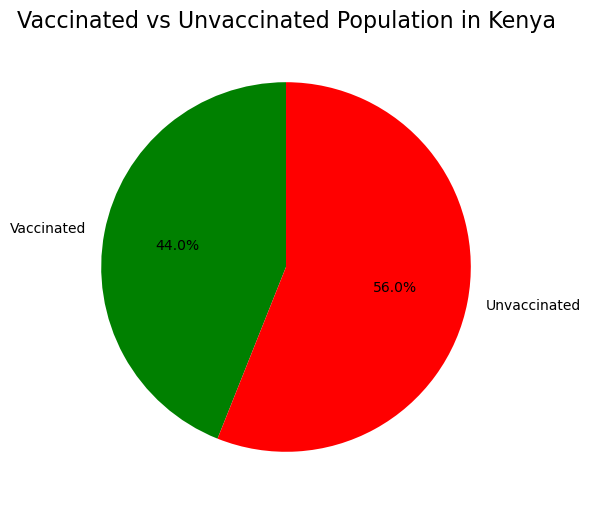

In [98]:
## Pie Chart for Vaccinated vs. Unvaccinated Population
# Choose one country for pie chart (e.g., Kenya)
country = 'Kenya'
kenya_data = df[df['location'] == country].dropna(subset=['total_vaccinations', 'population'])

# Get the latest data for the chosen country
kenya_latest = kenya_data.sort_values('date').tail(1)
total_vaccinated = kenya_latest['total_vaccinations'].values[0]
total_population = kenya_latest['population'].values[0]
unvaccinated = total_population - total_vaccinated

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie([total_vaccinated, unvaccinated], labels=['Vaccinated', 'Unvaccinated'], autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
plt.title(f"Vaccinated vs Unvaccinated Population in {country}", fontsize=16)
plt.show()

#### Visualize cases or vaccination rates by country on a world map.

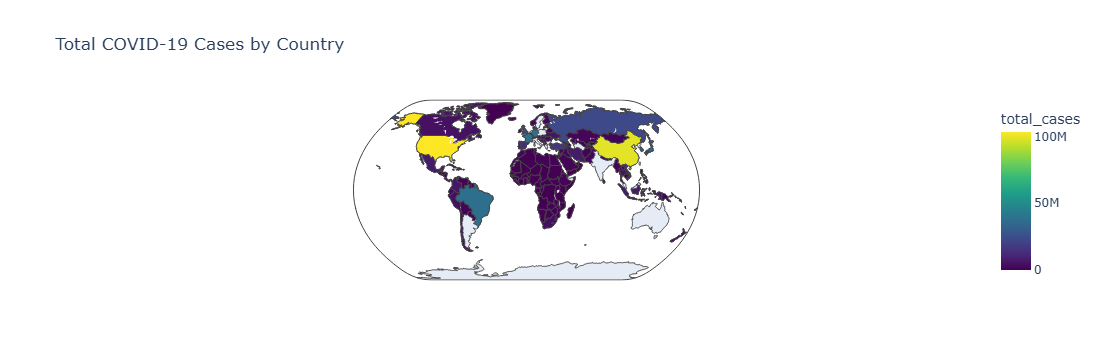

In [111]:
import plotly.express as px
import pandas as pd

# Filter the most recent data for each country
latest_data = df.sort_values('date').groupby('location').tail(1)

# Prepare a DataFrame with iso_code and total_cases for the latest date
choropleth_data = latest_data[['iso_code', 'total_cases']]

# If you want to visualize vaccination rates instead of total cases, you can use:
# choropleth_data['vaccinated_percentage'] = (latest_data['total_vaccinations'] / latest_data['population']) * 100

# Plotting the choropleth map
fig = px.choropleth(choropleth_data,
                    locations="iso_code",  # Using iso_code for countries
                    color="total_cases",  # Variable to color the countries by
                    hover_name="iso_code",  # Info displayed on hover
                    color_continuous_scale="Viridis",  # Color scale
                    title="Total COVID-19 Cases by Country",
                    projection="natural earth")  # You can choose a different map projection

# Show the plot
fig.show()

 #### Summary of Findings

    1. The United States and India had the largest total COVID-19 case counts, with steep growth curves compared to Kenya and China.

    2. The United States also reported the highest number of deaths, followed by India, Kenya, and China.

    3. Daily new case trends were highly correlated between the United States and India, suggesting similar pandemic waves.

    4. Kenya exhibited a higher death rate, raising questions about healthcare system impacts or reporting.

    5. Vaccination rollout was fastest and most extensive in the United States.

#### Anomalies:

    1. Kenya’s high death rate despite lower case numbers.

    2. Distinct epidemic dynamics in Kenya, as shown by weak correlation with other countries.

    3. China’s low reported cases and deaths, possibly reflecting different containment or reporting.